# Exact and approximative solutions of ODEs of first degree

## Helper functions and declarations

### Loading libraries needed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from collections.abc import Callable

plt.style.use('seaborn-v0_8')

### Using `x` and `f` as global symbols for the symbolic solver

In [2]:
x = sp.Symbol("x")
f = sp.Function("f")

### Plot direction field and solutions

In [3]:
def plot_ode(ode: Callable[[float | np.ndarray, float | np.ndarray], float | np.ndarray], min_x: float, max_x: float, min_y: float, max_y: float, solutions: list[tuple[str, object] | tuple[str, object, str]] = [], title: str | None = None):
    """Plot the direction field of a given ODE along with provided solutions.

    Args:
        ode (Callable[[float  |  np.ndarray, float  |  np.ndarray], float  |  np.ndarray]): ODE function f(x, y).
        min_x (float): Minimum x value for the plot
        max_x (float): Maximum x value for the plot
        min_y (float): Minimum y value for the plot
        max_y (float): Maximum y value for the plot
        solutions (list[tuple[str, object]  |  tuple[str, object, str]], optional): List of solutions to be plotted. Defaults to [].
        title (str | None, optional): Diagram titel. Defaults to None.
    """
    # Create a grid of points
    x_points = np.linspace(min_x, max_x, 20)
    y_points = np.linspace(min_y, max_y, 20)
    X, Y = np.meshgrid(x_points, y_points)

    # Calculate the slope at each point
    U = 1
    V = ode(X, Y)

    # Normalize arrows
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U / N, V / N

    # Plot the direction field
    _, ax = plt.subplots(figsize=(16, 9))
    ax.quiver(X, Y, U2, V2, angles='xy', color='gray', scale=65, width=0.0015)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Plot the solutions provided
    for solution in solutions:
        # Plot sympy.dsolve solutions
        if isinstance(solution[1], sp.core.relational.Equality):  # pyright: ignore[reportAttributeAccessIssue]
            def lmbda(x_val): return float(solution[1].args[1].evalf(subs={x: x_val}))  # pyright: ignore[reportAttributeAccessIssue]
            vectorized_solution = np.vectorize(lmbda)
            x_vals = np.linspace(min_x, max_x, 400)
            y_vals = vectorized_solution(x_vals)
            ax.plot(x_vals, y_vals, label=solution[0], color=solution[2] if len(solution) > 2 else 'black')
        # Plot numerical solutions
        if isinstance(solution[1], tuple):
            ax.plot(solution[1][0], solution[1][1], label=solution[0], color=solution[2] if len(solution) > 2 else 'black')

    # Show title
    if title is not None:
        ax.set_title(title)

    # Show legend
    ax.legend()

## Numerical solvers

### Euler steps

In [4]:
def euler_method(ode: Callable[[float | np.ndarray, float | np.ndarray], float], x0: float, y0: float, h: float, max_x: float) -> tuple[list[float], list[float]]:
    """Solve an ODE using the Euler method.

    Args:
        ode (Callable[[float  |  np.ndarray, float  |  np.ndarray], float]): ODE function f(x, y).
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        h (float): Step size.
        max_x (float): Maximum x value to solve up to.

    Returns:
        tuple[list[float], list[float]]: Lists of x and y values representing the solution.
    """
    xs = [x0]
    ys = [y0]
    ode_evaluation_counter = 0

    while x0 <= max_x:
        y0 += h * ode(x0, y0)
        x0 += h
        xs.append(x0)
        ys.append(y0)
        ode_evaluation_counter += 1

    print("Needed ODE evaluations for Euler:", ode_evaluation_counter)
    return xs, ys

### Heun

In [5]:
def heun_method(ode: Callable[[float | np.ndarray, float | np.ndarray], float], x0: float, y0: float, h: float, max_x: float) -> tuple[list[float], list[float]]:
    """Solve an ODE using the Heun method.

    Args:
        ode (Callable[[float  |  np.ndarray, float  |  np.ndarray], float]): ODE function f(x, y).
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        h (float): Step size.
        max_x (float): Maximum x value to solve up to.

    Returns:
        tuple[list[float], list[float]]: Lists of x and y values representing the solution.
    """
    xs = [x0]
    ys = [y0]
    ode_evaluation_counter = 0

    while x0 <= max_x:
        k1 = ode(x0, y0)
        k2 = ode(x0 + h, y0 + h * k1)
        x0 += h
        y0 += h * (k1 + k2) / 2
        xs.append(x0)
        ys.append(y0)
        ode_evaluation_counter += 2

    print("Needed ODE evaluations for Heun:", ode_evaluation_counter)
    return xs, ys

### Runge Kutta (2<sup>nd</sup> order)

In [6]:
def rk2_method(ode: Callable[[float | np.ndarray, float | np.ndarray], float], x0: float, y0: float, h: float, max_x: float) -> tuple[list[float], list[float]]:
    """Solve an ODE using the Runge Kutta method of 2nd order.

    Args:
        ode (Callable[[float  |  np.ndarray, float  |  np.ndarray], float]): ODE function f(x, y).
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        h (float): Step size.
        max_x (float): Maximum x value to solve up to.

    Returns:
        tuple[list[float], list[float]]: Lists of x and y values representing the solution.
    """
    xs = [x0]
    ys = [y0]
    ode_evaluation_counter = 0

    while x0 <= max_x:
        k1 = ode(x0, y0)
        k2 = ode(x0 + h / 2, y0 + h / 2 * k1)
        x0 += h
        y0 += h * k2
        xs.append(x0)
        ys.append(y0)
        ode_evaluation_counter += 2

    print("Needed ODE evaluations for Runge Kutta (2nd order):", ode_evaluation_counter)
    return xs, ys

### Runge Kutta (3<sup>rd</sup> order)

In [7]:
def rk3_method(ode: Callable[[float | np.ndarray, float | np.ndarray], float], x0: float, y0: float, h: float, max_x: float) -> tuple[list[float], list[float]]:
    """Solve an ODE using the Runge Kutta method of 3rd order.

    Args:
        ode (Callable[[float  |  np.ndarray, float  |  np.ndarray], float]): ODE function f(x, y).
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        h (float): Step size.
        max_x (float): Maximum x value to solve up to.

    Returns:
        tuple[list[float], list[float]]: Lists of x and y values representing the solution.
    """
    xs = [x0]
    ys = [y0]
    ode_evaluation_counter = 0

    while x0 <= max_x:
        k1 = ode(x0, y0)
        k2 = ode(x0 + h / 2, y0 + h / 2 * k1)
        k3 = ode(x0 + h, y0 - h * k1 + 2 * h * k2)
        x0 += h
        y0 += h * (1 / 6 * k1 + 4 / 6 * k2 + 1 / 6 * k3)
        xs.append(x0)
        ys.append(y0)
        ode_evaluation_counter += 3

    print("Needed ODE evaluations for Runge Kutta (3rd order):", ode_evaluation_counter)
    return xs, ys

### Runge Kutta (4<sup>th</sup> order)

In [8]:
def rk4_method(ode: Callable[[float | np.ndarray, float | np.ndarray], float], x0: float, y0: float, h: float, max_x: float) -> tuple[list[float], list[float]]:
    """Solve an ODE using the Runge Kutta method of 4thd order.

    Args:
        ode (Callable[[float  |  np.ndarray, float  |  np.ndarray], float]): ODE function f(x, y).
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        h (float): Step size.
        max_x (float): Maximum x value to solve up to.

    Returns:
        tuple[list[float], list[float]]: Lists of x and y values representing the solution.
    """
    xs = [x0]
    ys = [y0]
    ode_evaluation_counter = 0

    while x0 <= max_x:
        k1 = ode(x0, y0)
        k2 = ode(x0 + h / 2, y0 + h / 2 * k1)
        k3 = ode(x0 + h / 2, y0 + h / 2 * k2)
        k4 = ode(x0 + h, y0 + h * k3)
        x0 += h
        y0 += h * (1 / 6 * k1 + 1 / 3 * k2 + 1 / 3 * k3 + 1 / 6 * k4)
        xs.append(x0)
        ys.append(y0)
        ode_evaluation_counter += 4

    print("Needed ODE evaluations for Runge Kutta (4th order):", ode_evaluation_counter)
    return xs, ys

### Runge Kutta Fehlberg (4<sup>th</sup> and 5<sup>th</sup> order with optional step size adjustment)

In [9]:
def rkf45_method(ode: Callable[[float | np.ndarray, float | np.ndarray], float], x0: float, y0: float, h: float, max_x: float, auto_h: bool = True) -> tuple[list[float], list[float]]:
    """Solve an ODE using the Runge Kutta Fehlberg method of 4nd and 5th order.

    Args:
        ode (Callable[[float  |  np.ndarray, float  |  np.ndarray], float]): ODE function f(x, y).
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        h (float): Step size or maximum step size.
        max_x (float): Maximum x value to solve up to.
        auto_h (bool, optional): Whether to automatically adjust the step size. In this case h is used as the maximum value. Defaults to True.

    Returns:
        tuple[list[float], list[float]]: Lists of x and y values representing the solution.
    """
    xs = [x0]
    ys = [y0]
    ode_evaluation_counter = 0
    max_h = h

    tol = 1e-6

    while x0 <= max_x:
        k1 = ode(x0, y0)
        k2 = ode(x0 + h / 4, y0 + h / 4 * k1)
        k3 = ode(x0 + 3 * h / 8, y0 + 3 * h / 32 * k1 + 9 * h / 32 * k2)
        k4 = ode(x0 + 12 * h / 13, y0 + 1932 * h / 2197 * k1 - 7200 * h / 2197 * k2 + 7296 * h / 2197 * k3)
        k5 = ode(x0 + h, y0 + 439 * h / 216 * k1 - 8 * h * k2 + 3680 * h / 513 * k3 - 845 * h / 4104 * k4)
        k6 = ode(x0 + h / 2, y0 - 8 * h / 27 * k1 + 2 * h * k2 - 3544 * h / 2565 * k3 + 1859 * h / 4104 * k4 - 11 * h / 40 * k5)
        y4_delta = h * (25 / 216 * k1 + 1408 / 2565 * k3 + 2197 / 4104 * k4 - 1 / 5 * k5)
        y5_delta = h * (16 / 135 * k1 + 6656 / 12825 * k3 + 28561 / 56430 * k4 - 9 / 50 * k5 + 2 / 55 * k6)
        x0 += h
        y0 += y5_delta
        xs.append(x0)
        ys.append(y0)
        ode_evaluation_counter += 6

        if auto_h:
            s = (tol * h / abs(y5_delta - y4_delta))**0.25
            h = min(max_h, s)

    print("Needed ODE evaluations for Runge Kutta Fehlberg (4th and 5th order):", ode_evaluation_counter)
    return xs, ys

## Example ODEs

### $y'(x)=y(x)$

Eq(f(x), 1.0*exp(x))

Needed ODE evaluations for Euler: 21
Needed ODE evaluations for Heun: 22
Needed ODE evaluations for Runge Kutta (2nd order): 22
Needed ODE evaluations for Runge Kutta (3rd order): 21
Needed ODE evaluations for Runge Kutta (4th order): 24
Needed ODE evaluations for Runge Kutta Fehlberg (4th and 5th order): 126


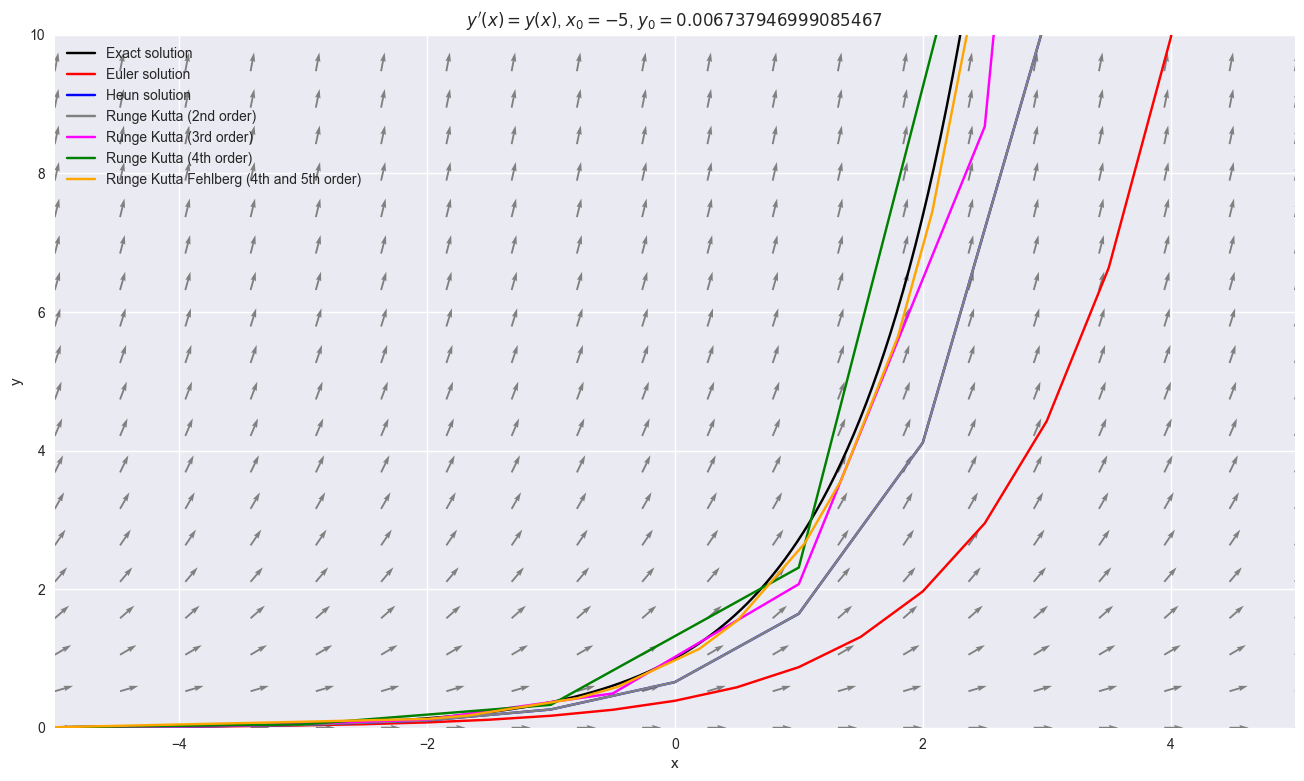

In [10]:
# Start value
x0 = -5
y0 = np.exp(-5)

# Step wide (for approximations)
h = 0.5

# Plot area
min_x = -5
max_x = 5
min_y = 0
max_y = 10

# Determining the exact solution
exact_solution = sp.dsolve(f(x).diff(x) - f(x), ics={f(x0): y0})  # pyright: ignore[reportAttributeAccessIssue]
display(exact_solution)

# ODE as a function (for plotting the direction field and calculating the approximations)
def ode(x, y): return y

# Approximations
euler_solution = euler_method(ode, x0=x0, y0=y0, h=h, max_x=max_x)
heun_solution = heun_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)  # Since the higher order method are using more ode evaluations, we increase the step wide for them to be fair
rk2_solution = rk2_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)
rk3_solution = rk3_method(ode, x0=x0, y0=y0, h=h * 3, max_x=max_x)
rk4_solution = rk4_method(ode, x0=x0, y0=y0, h=h * 4, max_x=max_x)
rkf45_solution = rkf45_method(ode, x0=x0, y0=y0, h=h * 6, max_x=max_x, auto_h=True)

# Output results
solutions = [
    ("Exact solution", exact_solution),
    ('Euler solution', euler_solution, 'red'),
    ('Heun solution', heun_solution, 'blue'),
    ('Runge Kutta (2nd order)', rk2_solution, 'gray'),
    ('Runge Kutta (3rd order)', rk3_solution, 'magenta'),
    ('Runge Kutta (4th order)', rk4_solution, 'green'),
    ('Runge Kutta Fehlberg (4th and 5th order)', rkf45_solution, 'orange')
]
plot_ode(ode, min_x, max_x, min_y, max_y, solutions, '$y\'(x)=y(x)$, $x_0=' + str(x0) + '$, $y_0=' + str(y0) + '$')

### $y'(x)=y(x)-x$

Eq(f(x), x + 1)

Needed ODE evaluations for Euler: 21
Needed ODE evaluations for Heun: 22
Needed ODE evaluations for Runge Kutta (2nd order): 22
Needed ODE evaluations for Runge Kutta (3rd order): 21
Needed ODE evaluations for Runge Kutta (4th order): 24
Needed ODE evaluations for Runge Kutta Fehlberg (4th and 5th order): 24


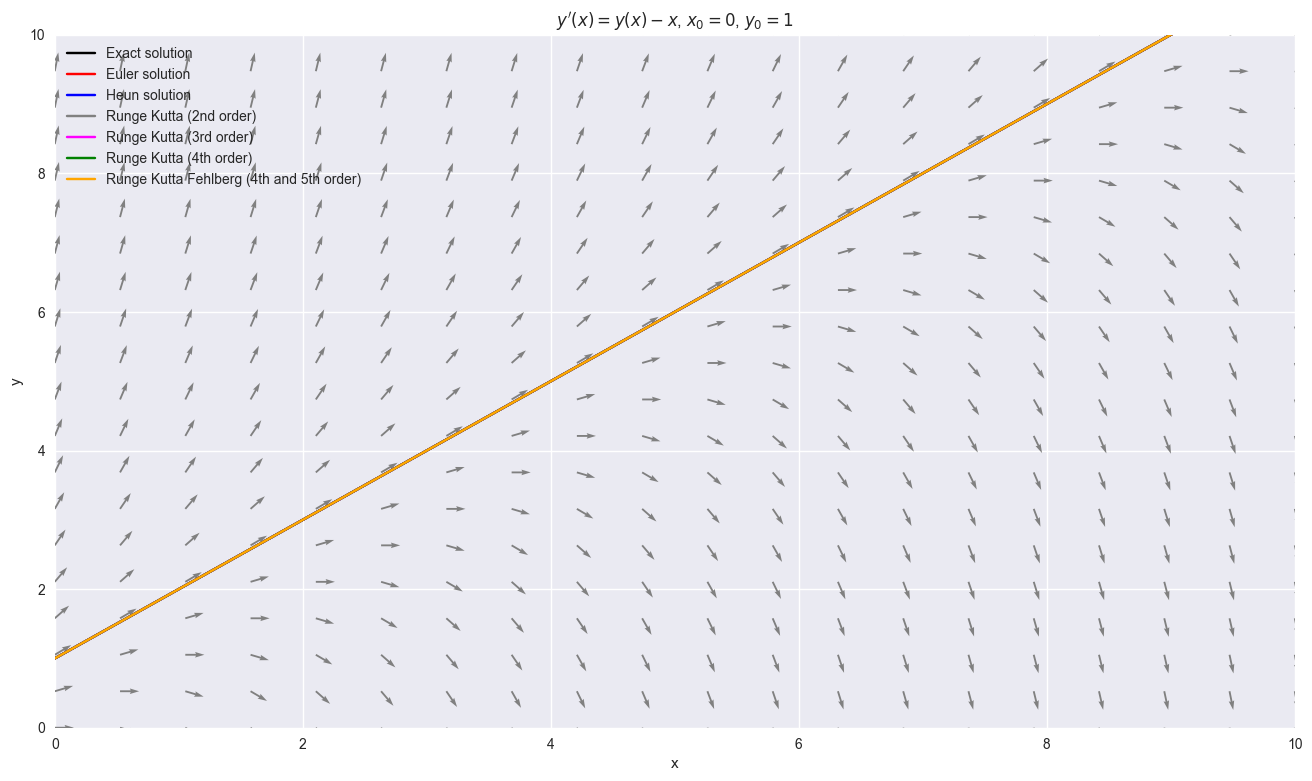

In [11]:
# Start value
x0 = 0
y0 = 1

# Step wide (for approximations)
h = 0.5

# Plot area
min_x = 0
max_x = 10
min_y = 0
max_y = 10

# Determining the exact solution
exact_solution = sp.dsolve(f(x).diff(x) - f(x) + x, ics={f(x0): y0})  # pyright: ignore[reportAttributeAccessIssue]
display(exact_solution)

# ODE as a function (for plotting the direction field and calculating the approximations)
def ode(x, y): return y - x

# Approximations
euler_solution = euler_method(ode, x0=x0, y0=y0, h=h, max_x=max_x)
heun_solution = heun_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)  # Since the higher order method are using more ode evaluations, we increase the step wide for them to be fair
rk2_solution = rk2_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)
rk3_solution = rk3_method(ode, x0=x0, y0=y0, h=h * 3, max_x=max_x)
rk4_solution = rk4_method(ode, x0=x0, y0=y0, h=h * 4, max_x=max_x)
rkf45_solution = rkf45_method(ode, x0=x0, y0=y0, h=h * 6, max_x=max_x, auto_h=True)

# Output results
solutions = [
    ("Exact solution", exact_solution),
    ('Euler solution', euler_solution, 'red'),
    ('Heun solution', heun_solution, 'blue'),
    ('Runge Kutta (2nd order)', rk2_solution, 'gray'),
    ('Runge Kutta (3rd order)', rk3_solution, 'magenta'),
    ('Runge Kutta (4th order)', rk4_solution, 'green'),
    ('Runge Kutta Fehlberg (4th and 5th order)', rkf45_solution, 'orange')
]
plot_ode(ode, min_x, max_x, min_y, max_y, solutions, '$y\'(x)=y(x)-x$, $x_0=' + str(x0) + '$, $y_0=' + str(y0) + '$')

### $y'(x)=3x^2y(x)+2x^2$

Eq(f(x), 7.79314234166266*exp(x**3) - 2/3)

Needed ODE evaluations for Euler: 25
Needed ODE evaluations for Heun: 26
Needed ODE evaluations for Runge Kutta (2nd order): 26
Needed ODE evaluations for Runge Kutta (3rd order): 27
Needed ODE evaluations for Runge Kutta (4th order): 28
Needed ODE evaluations for Runge Kutta Fehlberg (4th and 5th order): 42


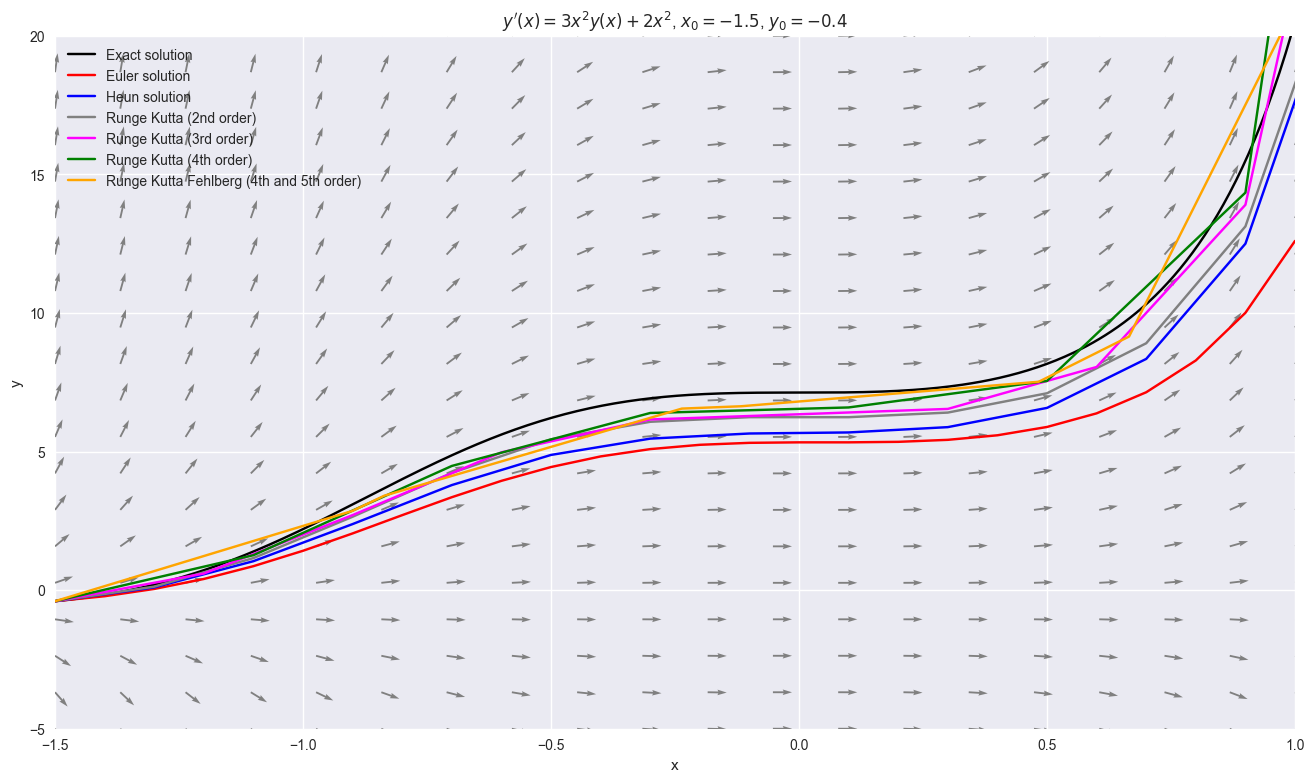

In [12]:
# Start value
x0 = -1.5
y0 = -0.4

# Step wide (for approximations)
h = 0.1

# Plot area
min_x = -1.5
max_x = 1
min_y = -5
max_y = 20

# Determining the exact solution
exact_solution = sp.dsolve(f(x).diff(x) - 3 * x**2 * f(x) - 2 * x**2, ics={f(x0): y0}) # type: ignore
display(exact_solution)

# ODE as a function (for plotting the direction field and calculating the approximations)
def ode(x, y): return 3 * x**2 * y + 2 * x**2

# Approximations
euler_solution = euler_method(ode, x0=x0, y0=y0, h=h, max_x=max_x)
heun_solution = heun_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)  # Since the higher order method are using more ode evaluations, we increase the step wide for them to be fair
rk2_solution = rk2_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)
rk3_solution = rk3_method(ode, x0=x0, y0=y0, h=h * 3, max_x=max_x)
rk4_solution = rk4_method(ode, x0=x0, y0=y0, h=h * 4, max_x=max_x)
rkf45_solution = rkf45_method(ode, x0=x0, y0=y0, h=h * 6, max_x=max_x, auto_h=True)

# Output results
solutions = [
    ("Exact solution", exact_solution),
    ('Euler solution', euler_solution, 'red'),
    ('Heun solution', heun_solution, 'blue'),
    ('Runge Kutta (2nd order)', rk2_solution, 'gray'),
    ('Runge Kutta (3rd order)', rk3_solution, 'magenta'),
    ('Runge Kutta (4th order)', rk4_solution, 'green'),
    ('Runge Kutta Fehlberg (4th and 5th order)', rkf45_solution, 'orange')
]
plot_ode(ode, min_x, max_x, min_y, max_y, solutions, '$y\'(x)=3x^2y(x)+2x^2$, $x_0=' + str(x0) + '$, $y_0=' + str(y0) + '$')

### $y'(x)=-2y(x)$

Eq(f(x), -0.0248935341839319*exp(-2*x))

Needed ODE evaluations for Euler: 11
Needed ODE evaluations for Heun: 12
Needed ODE evaluations for Runge Kutta (2nd order): 12
Needed ODE evaluations for Runge Kutta (3rd order): 12
Needed ODE evaluations for Runge Kutta (4th order): 12
Needed ODE evaluations for Runge Kutta Fehlberg (4th and 5th order): 18


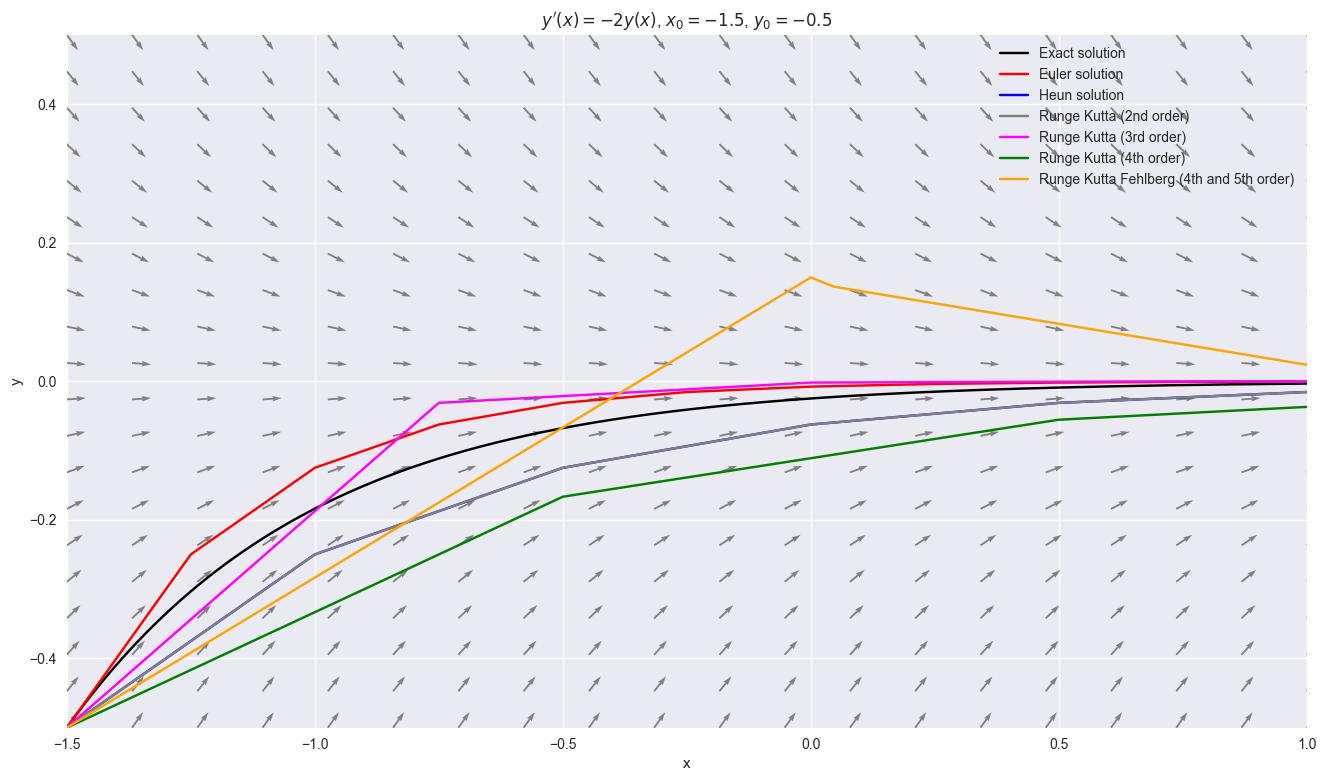

In [13]:
# Start value
x0 = -1.5
y0 = -0.5

# Step wide (for approximations)
h = 0.25

# Plot area
min_x = -1.5
max_x = 1
min_y = -0.5
max_y = 0.5

# Determining the exact solution
exact_solution = sp.dsolve(f(x).diff(x) + 2 * f(x), ics={f(x0): y0})  # type: ignore
display(exact_solution)

# ODE as a function (for plotting the direction field and calculating the approximations)
def ode(x, y): return -2 * y

# Approximations
euler_solution = euler_method(ode, x0=x0, y0=y0, h=h, max_x=max_x)
heun_solution = heun_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)  # Since the higher order method are using more ode evaluations, we increase the step wide for them to be fair
rk2_solution = rk2_method(ode, x0=x0, y0=y0, h=h * 2, max_x=max_x)
rk3_solution = rk3_method(ode, x0=x0, y0=y0, h=h * 3, max_x=max_x)
rk4_solution = rk4_method(ode, x0=x0, y0=y0, h=h * 4, max_x=max_x)
rkf45_solution = rkf45_method(ode, x0=x0, y0=y0, h=h * 6, max_x=max_x, auto_h=True)

# Output results
solutions = [
    ("Exact solution", exact_solution),
    ('Euler solution', euler_solution, 'red'),
    ('Heun solution', heun_solution, 'blue'),
    ('Runge Kutta (2nd order)', rk2_solution, 'gray'),
    ('Runge Kutta (3rd order)', rk3_solution, 'magenta'),
    ('Runge Kutta (4th order)', rk4_solution, 'green'),
    ('Runge Kutta Fehlberg (4th and 5th order)', rkf45_solution, 'orange')
]
plot_ode(ode, min_x, max_x, min_y, max_y, solutions, '$y\'(x)=-2y(x)$, $x_0=' + str(x0) + '$, $y_0=' + str(y0) + '$')